# Importing all packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Checkpoint 1

## Loading the companies and rounds data into two data frames and naming them companies and rounds2 respectively.

In [3]:
companies = pd.read_csv("companies.txt",sep="\t",encoding="ISO-8859-1")
rounds2  = pd.read_csv("rounds2.csv", encoding="ISO-8859-1")
companies['permalink'] = companies['permalink'].str.lower()
companies = companies[~companies['permalink'].str.contains(r'[^\x00-\x7F]+')]
rounds2 = rounds2[~rounds2['company_permalink'].str.contains(r'[^\x00-\x7F]+')]
#companies.head(2)
#companies.info()
#rounds2.head(200)
#rounds2.info()

## Unique companies in rounds2

In [4]:
UniqueCompanies_rounds2 = rounds2['company_permalink'].nunique()
print(UniqueCompanies_rounds2)

90174


## Unique companies in companies

In [5]:
UniqueCompanies_companies = companies['permalink'].nunique()
print(UniqueCompanies_companies)

66300


## Merging the two data frames into the merged frame master_frame

In [6]:
companies['permalink'] = companies['permalink'].str.lower()
master_frame = pd.merge(companies,rounds2, left_on='permalink', right_on = 'company_permalink')
#master_frame.head()
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57437 entries, 0 to 57436
Data columns (total 16 columns):
permalink                  57437 non-null object
name                       57436 non-null object
homepage_url               54340 non-null object
category_list              55798 non-null object
status                     57437 non-null object
country_code               53084 non-null object
state_code                 51935 non-null object
region                     52328 non-null object
city                       52329 non-null object
founded_at                 47181 non-null object
company_permalink          57437 non-null object
funding_round_permalink    57437 non-null object
funding_round_type         57437 non-null object
funding_round_code         15660 non-null object
funded_at                  57437 non-null object
raised_amount_usd          47524 non-null float64
dtypes: float64(1), object(15)
memory usage: 7.4+ MB


# Checkpoint 2

## Calculating the most representative value of the investment amount for funding types = venture

In [7]:
df_1 = master_frame[master_frame.funding_round_type == 'venture']
#df_1 = df_1.drop('funding_round_code',axis=1)
#df_1 = df_1[df_1.isnull().sum(axis=1) <= 5]
df_1 = df_1[~np.isnan(df_1['raised_amount_usd'])]
#round(100*(df_1.isnull().sum()/len(df_1.index)))
df_1['raised_amount_usd'].describe()

count    2.527000e+04
mean     1.119575e+07
std      2.735704e+07
min      0.000000e+00
25%      1.600000e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.200000e+09
Name: raised_amount_usd, dtype: float64

## Calculating the most representative value of the investment amount for funding types = angel

In [8]:
df_1 = master_frame[master_frame.funding_round_type == 'angel']
#df_1 = df_1.drop('funding_round_code',axis=1)
#df_1 = df_1[df_1.isnull().sum(axis=1) <= 5]
df_1 = df_1[~np.isnan(df_1['raised_amount_usd'])]
#round(100*(df_1.isnull().sum()/len(df_1.index)))
df_1['raised_amount_usd'].describe()
#df_1.head(2000)

count    2.468000e+03
mean     1.077520e+06
std      1.015883e+07
min      0.000000e+00
25%      1.500000e+05
50%      4.000000e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

## Calculating the most representative value of the investment amount for funding types = seed

In [9]:
df_1 = master_frame[master_frame.funding_round_type == 'seed']
df_1 = df_1[~np.isnan(df_1['raised_amount_usd'])]
df_1['raised_amount_usd'].describe()

count    1.167100e+04
mean     7.236761e+05
std      2.140654e+06
min      0.000000e+00
25%      5.486500e+04
50%      2.853210e+05
75%      1.000000e+06
max      1.300000e+08
Name: raised_amount_usd, dtype: float64

## Calculating the most representative value of the investment amount for funding types = private equity

In [10]:
df_1 = master_frame[master_frame.funding_round_type == 'private_equity']
df_1 = df_1[~np.isnan(df_1['raised_amount_usd'])]
df_1['raised_amount_usd'].describe()

count    9.300000e+02
mean     7.533175e+07
std      2.155557e+08
min      0.000000e+00
25%      5.000000e+06
50%      2.180000e+07
75%      8.000000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

### Since the average representative amount of VENTURE type of investment lies between 5 to 15 million USD, it is most suitable for Spark Funds

# Checkpoint 3

## Get the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type) into a data frame named top9 with the top nine countries

In [11]:
df_1 = master_frame[master_frame.funding_round_type == 'venture']
df_1 = df_1[~np.isnan(df_1['raised_amount_usd'])]
top9 = df_1.groupby('country_code').sum()
top9.nlargest(9, 'raised_amount_usd')

,raised_amount_usd
country_code,
USA,1.979186e+11
CHN,2.093556e+10
GBR,9.518339e+09
IND,6.875666e+09
CAN,4.859623e+09
FRA,3.849935e+09
ISR,3.455887e+09
DEU,3.233840e+09
NLD,1.992621e+09


# Checkpoint 4

## Extracting the primary sector of each category list from the category_list column by first cleaning the data in column 'category_list' and then getting the first element

In [12]:
df_1[['category_list']] = df_1[['category_list']].fillna(value=0)
df_1['primary sector'] = df_1['category_list'].str.split('|').str[0]
df_1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology
5,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
6,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics


## Using the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors

In [13]:
mappings  = pd.read_csv("mapping.csv", sep=',', encoding="ISO-8859-1")
df_1['main sector'] = 0
for index,row in df_1.iterrows():
    df = mappings[(mappings['category_list'] == row['primary sector'])]
    if df.empty:
        s1 = 0
    else:
        s1= df.columns[(df == 1).iloc[0]]
        s1 = s1.values[0]
    df_1.loc[index,'main sector'] = s1

df_1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web,"News, Search and Messaging"
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology,Cleantech / Semiconductors
5,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics,0
6,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics,0


# Checkpoint 5

## Creating data frame D1 for USA containing the observations of funding type VENTURE falling within the 5-15 million USD range

In [14]:
D1 = df_1[df_1.country_code == 'USA']
D1=D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]
D1['Number_Of_Investments'] = D1.groupby('main sector')['main sector'].transform('count')
D1['Total_Amount_Invested'] = D1.groupby('main sector')['raised_amount_usd'].transform('sum')

## Total number of Investments for USA of VENTURE type

In [15]:
print(D1['permalink'].count())

6146


## Total amount of investment (USD)

In [16]:
print(D1['raised_amount_usd'].sum())

54889010421.0


## Top 3 sectors for USA of VENTURE type

In [17]:
D1_temp= D1.sort_values(by=['raised_amount_usd'],ascending=False).drop_duplicates('Number_Of_Investments').sort_index().reset_index(drop=True)
D1_temp = D1_temp.sort_values(by=['Number_Of_Investments'],ascending=False)
D1_temp.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main sector,Number_Of_Investments,Total_Amount_Invested
2,/organization/e-rewards,e-Rewards,http://www.e-rewardsinc.com,E-Commerce,operating,USA,TX,Dallas,Plano,01-01-1999,/organization/e-rewards,/funding-round/11157ea89da1b4549761873cb8da945a,venture,NaN,01-01-1999,15000000.0,E-Commerce,Others,1476,1.316674e+10
1,/organization/claritas-genomics,Claritas Genomics,http://claritasgenomics.com,Biotechnology,operating,USA,MA,Boston,Cambridge,01-01-2013,/organization/claritas-genomics,/funding-round/9c65a8ec8939896e72483b00dc722455,venture,B,26-01-2015,15000000.0,Biotechnology,Cleantech / Semiconductors,1196,1.103233e+10
3,/organization/flat-world-knowledge,Flat World Education,http://www.flatworld.com,Colleges|Education|SaaS|Textbooks,operating,USA,DC,"Washington, D.C.",Washington,01-01-2007,/organization/flat-world-knowledge,/funding-round/82609be3028ee9cd8ca1e2363e72d7a0,venture,B,20-01-2011,15000000.0,Colleges,"Social, Finance, Analytics, Advertising",966,8.416801e+09
7,/organization/sencha,Sencha,http://www.sencha.com,Curated Web|Enterprise Software|Mobile|Open So...,operating,USA,CA,SF Bay Area,Redwood City,01-04-2007,/organization/sencha,/funding-round/f08d957ffcbd273cda1f9675f0a773e9,venture,B,24-10-2011,15000000.0,Curated Web,"News, Search and Messaging",778,6.909601e+09
6,/organization/segment-io,Segment,http://segment.com,Analytics|Developer APIs|Google Apps,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/organization/segment-io,/funding-round/1d8ed4f83e93c47b9e4afc6a0d82e08b,venture,A,08-10-2014,15000000.0,Analytics,0,497,4.409150e+09


## Companies with highest investment in Others sector for USA of VENTURE type

In [18]:
D1_temp0 = D1[D1['main sector'] == 'Others']
D1_temp0.sort_values(by=['raised_amount_usd'],ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main sector,Number_Of_Investments,Total_Amount_Invested
3220,/organization/appcelerator,Appcelerator,http://appcelerator.com,Enterprise Software|Mobile|Mobility|Open Source,operating,USA,CA,SF Bay Area,Mountain View,01-09-2006,/organization/appcelerator,/funding-round/a3cf130fb3f34ee77aa3ad1c1a730c6a,venture,C,01-11-2011,15000000.0,Enterprise Software,Others,1476,1.316674e+10
51672,/organization/tsheets,TSheets,http://www.tsheets.com,Software,operating,USA,ID,ID - Other,Eagle,01-01-2006,/organization/tsheets,/funding-round/17e1945de48388b619144cbccaa31b84,venture,A,05-10-2015,15000000.0,Software,Others,1476,1.316674e+10
38861,/organization/predictix,Predictix,http://www.predictix.com,Enterprise Resource Planning|Predictive Analyt...,operating,USA,GA,Atlanta,Atlanta,01-01-2005,/organization/predictix,/funding-round/f2f8819cdd5689b858ff3943bd3db4c1,venture,A,03-12-2014,15000000.0,Enterprise Resource Planning,Others,1476,1.316674e+10
47136,/organization/src-computers,SRC Computers,http://srccomp.com,Software,operating,USA,CO,Colorado Springs,Colorado Springs,01-01-1996,/organization/src-computers,/funding-round/d25f1ec7e668582089e34acf6a86dafe,venture,NaN,08-10-2013,15000000.0,Software,Others,1476,1.316674e+10
10380,/organization/clinicient,Clinicient,http://www.clinicient.com,Software,operating,USA,OR,"Portland, Oregon",Portland,01-01-1998,/organization/clinicient,/funding-round/cbdaaaa1c3eb68063cb7588302df32c4,venture,C,04-03-2014,15000000.0,Software,Others,1476,1.316674e+10
49392,/organization/tendril,Tendril,http://www.tendrilinc.com,Software,operating,USA,CO,Denver,Boulder,01-01-2004,/organization/tendril,/funding-round/59389d13a9dbebe2f3eb34f641554aa8,venture,NaN,07-12-2012,15000000.0,Software,Others,1476,1.316674e+10
52134,/organization/udacity,Udacity,http://www.udacity.com,EdTech|Education,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/udacity,/funding-round/ce5a787ab9302f30a8ecdb129b1da939,venture,B,25-10-2012,15000000.0,EdTech,Others,1476,1.316674e+10
10575,/organization/cloudshield-technologies,CloudShield Technologies,http://www.cloudshield.com,Web Hosting,acquired,USA,CA,SF Bay Area,Sunnyvale,01-01-2000,/organization/cloudshield-technologies,/funding-round/f7816363f045c194825d511d73bced3e,venture,D,17-09-2007,15000000.0,Web Hosting,Others,1476,1.316674e+10
3492,/organization/apreso-classroom,Apreso Classroom,http://www.apreso.com/ac_product_overview.asp,All Students|EdTech|Education,closed,USA,VA,"Washington, D.C.",Dulles,NaN,/organization/apreso-classroom,/funding-round/57f51f32a8b50176fc5f975b5535683b,venture,B,14-10-2008,15000000.0,All Students,Others,1476,1.316674e+10
37345,/organization/pets-com-2,Pets.com,http://www.pets.com,E-Commerce,operating,USA,CA,Los Angeles,Pasadena,NaN,/organization/pets-com-2,/funding-round/668344b0ab38231c6657114a920dc799,venture,D,10-12-1999,15000000.0,E-Commerce,Others,1476,1.316674e+10


## Companies with highest investment in Cleantech/Semiconductors sector for USA of VENTURE type

In [19]:
D1_temp1 = D1[D1['main sector'] == 'Cleantech / Semiconductors']
D1_temp1.sort_values(by=['raised_amount_usd'],ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main sector,Number_Of_Investments,Total_Amount_Invested
9070,/organization/cell-biosciences,CellBiosciences,http://www.proteinsimple.com,Biotechnology,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2001,/organization/cell-biosciences,/funding-round/b35b7dfb6f318b076ccb08eb106dcec1,venture,D,16-11-2009,15000000.0,Biotechnology,Cleantech / Semiconductors,1196,1.103233e+10
19599,/organization/genomatica,Genomatica,http://www.genomatica.com,Clean Technology,operating,USA,CA,San Diego,San Diego,01-01-2000,/organization/genomatica,/funding-round/6ca8ebbec542f4747f14530d598c3b21,venture,C,08-04-2010,15000000.0,Clean Technology,Cleantech / Semiconductors,1196,1.103233e+10
10205,/organization/clearedge-power,ClearEdge Power,http://www.clearedgepower.com,Clean Technology|Energy|Renewable Energies,operating,USA,OR,"Portland, Oregon",Hillsboro,01-01-2003,/organization/clearedge-power,/funding-round/798815164fb2794a202460c6ede66da1,venture,NaN,28-08-2009,15000000.0,Clean Technology,Cleantech / Semiconductors,1196,1.103233e+10
36967,/organization/pearl-therapeutics,Pearl Therapeutics,http://www.pearltherapeutics.com,Biotechnology|Health and Wellness|Medical|Phar...,acquired,USA,CA,SF Bay Area,Redwood City,01-01-2006,/organization/pearl-therapeutics,/funding-round/ee5da9559eed872679a97d1f9ad0e94a,venture,C,05-03-2010,15000000.0,Biotechnology,Cleantech / Semiconductors,1196,1.103233e+10
16409,/organization/esilicon,eSilicon,http://www.esilicon.com,Semiconductors,operating,USA,CA,SF Bay Area,Sunnyvale,01-01-2000,/organization/esilicon,/funding-round/75fc01ece6c230c1b4cd157fed558f1b,venture,F,14-02-2005,15000000.0,Semiconductors,Cleantech / Semiconductors,1196,1.103233e+10
17074,/organization/eyegate-pharmaceuticals,EyeGate Pharmaceuticals,http://www.eyegatepharma.com,Biotechnology,ipo,USA,MA,Boston,Waltham,01-01-1998,/organization/eyegate-pharmaceuticals,/funding-round/83c54e857d65b28d55d825058f267cd6,venture,C,12-03-2008,15000000.0,Biotechnology,Cleantech / Semiconductors,1196,1.103233e+10
10082,/organization/claritas-genomics,Claritas Genomics,http://claritasgenomics.com,Biotechnology,operating,USA,MA,Boston,Cambridge,01-01-2013,/organization/claritas-genomics,/funding-round/9c65a8ec8939896e72483b00dc722455,venture,B,26-01-2015,15000000.0,Biotechnology,Cleantech / Semiconductors,1196,1.103233e+10
35395,/organization/oorja-protonics,Oorja Fuel Cells,http://oorjafuelcells.com,Clean Technology,operating,USA,CA,SF Bay Area,Fremont,01-01-2004,/organization/oorja-protonics,/funding-round/78016e296353bd9fdd40e3e10f509bee,venture,B,14-03-2007,15000000.0,Clean Technology,Cleantech / Semiconductors,1196,1.103233e+10
18535,/organization/foresight-biotherapeutics,Foresight Biotherapeutics,http://foresightbio.com,Biotechnology,acquired,USA,NY,New York City,New York,01-01-2008,/organization/foresight-biotherapeutics,/funding-round/a1f4e5e4693d420e955f8464e18604b0,venture,NaN,13-11-2013,15000000.0,Biotechnology,Cleantech / Semiconductors,1196,1.103233e+10
35056,/organization/omniguide,OmniGuide,http://www.omni-guide.com,Clean Technology,operating,USA,MA,Boston,Cambridge,01-01-2003,/organization/omniguide,/funding-round/8a30c7d738b5f0ebdfc655b75e07cdce,venture,F,26-09-2013,15000000.0,Clean Technology,Cleantech / Semiconductors,1196,1.103233e+10


## Creating data frame D2 for GBR containing the observations of funding type VENTURE falling within the 5-15 million USD range

In [20]:
D2 = df_1[df_1.country_code == 'GBR']
D2=D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]
D2['Number_Of_Investments'] = D2.groupby('main sector')['main sector'].transform('count')
D2['Total_Amount_Invested'] = D2.groupby('main sector')['raised_amount_usd'].transform('sum')

## Total number of Investments for GBR of VENTURE type

In [21]:
print(D2['permalink'].count())

322


## Total amount of investment (USD)

In [22]:
print(D2['raised_amount_usd'].sum())

2830944491.0


## Top 3 sectors for GBR of VENTURE type

In [23]:
D2_temp= D2.sort_values(by=['raised_amount_usd'],ascending=False).drop_duplicates('Number_Of_Investments').sort_index().reset_index(drop=True)
D2_temp.sort_values(by=['Number_Of_Investments'],ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main sector,Number_Of_Investments,Total_Amount_Invested
7,/organization/silverrail-technologies,SilverRail Technologies,http://silverrailtech.com,Technology|Transportation|Travel,operating,GBR,H9,London,London,01-04-2009,/organization/silverrail-technologies,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,B,21-03-2012,15000000.0,Technology,Others,72,654658522.0
1,/organization/elixent,Elixent,https://www.elixent.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,01-01-2000,/organization/elixent,/funding-round/11039f250826f795bfb1939629708907,venture,C,06-04-2005,15000000.0,Semiconductors,Cleantech / Semiconductors,66,594261766.0
6,/organization/mythings,myThings,http://www.mythings.com,Accounting|Advertising|Performance Marketing,operating,GBR,H9,London,London,01-01-2005,/organization/mythings,/funding-round/33b07317347464878c1fd06c79a18e8c,venture,D,20-03-2012,15000000.0,Accounting,"Social, Finance, Analytics, Advertising",53,464387005.0
2,/organization/kaazing,Kaazing,http://www.kaazing.com,Apps|Data Integration|Enterprise Software|Info...,operating,GBR,H9,London,London,01-05-2007,/organization/kaazing,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,NaN,17-04-2013,15000000.0,Apps,"News, Search and Messaging",35,282801978.0
5,/organization/mubi,MUBI,http://mubi.com,Entertainment|Film|Social Media|Social Network...,operating,GBR,H9,London,London,14-02-2007,/organization/mubi,/funding-round/45bc0045939ded9c72c38d47290b3858,venture,D,05-01-2015,15000000.0,Entertainment,Entertainment,27,246120178.0
0,/organization/alfresco,Alfresco,http://www.alfresco.com,Document Management|Enterprises|Enterprise Sof...,operating,GBR,P9,London,Maidenhead,01-01-2005,/organization/alfresco,/funding-round/0db504d02c87c2b963283fd3c6d17594,venture,C,22-01-2008,13000000.0,Document Management,0,26,207450168.0
3,/organization/kano-computing,Kano Computing,http://kano.me,Hardware + Software,operating,GBR,H9,London,London,25-01-2013,/organization/kano-computing,/funding-round/39fe965ac91f031371ac49967a31a982,venture,A,04-05-2015,15000000.0,Hardware + Software,Manufacturing,25,213302433.0
8,/organization/trialreach,TrialReach,http://www.trialreach.com,Clinical Trials|Health and Wellness|Health Car...,operating,GBR,L1,London,Richmond,01-01-2009,/organization/trialreach,/funding-round/ab49e650422dc06902c68ac34a4f370f,venture,B,05-02-2015,13500000.0,Clinical Trials,Health,12,95535965.0
4,/organization/light-blue-optics,Light Blue Optics,http://www.lightblueoptics.com,Automotive|Consumer Electronics|Hardware + Sof...,operating,GBR,C3,London,Cambridge,02-01-2004,/organization/light-blue-optics,/funding-round/320fcbe59497214f44cf8bf84c073903,venture,A,19-07-2009,15000000.0,Automotive,Automotive & Sports,6,72426476.0


## Companies with highest investment in Others sector for GBR of VENTURE type

In [24]:
D2_temp0 = D2[D2['main sector'] == 'Others']
D2_temp0.sort_values(by=['raised_amount_usd'],ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main sector,Number_Of_Investments,Total_Amount_Invested
44836,/organization/silverrail-technologies,SilverRail Technologies,http://silverrailtech.com,Technology|Transportation|Travel,operating,GBR,H9,London,London,01-04-2009,/organization/silverrail-technologies,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,B,21-03-2012,15000000.0,Technology,Others,72,654658522.0
16170,/organization/environmentiq,EnvironmentIQ,NaN,Software,operating,GBR,C3,London,Cambridge,01-01-1988,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,A,06-03-2006,15000000.0,Software,Others,72,654658522.0
34294,/organization/notonthehighstreet,Notonthehighstreet,http://www.notonthehighstreet.com,E-Commerce,operating,GBR,L1,London,Richmond,04-04-2006,/organization/notonthehighstreet,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,D,21-05-2012,15000000.0,E-Commerce,Others,72,654658522.0
43789,/organization/sensage,SenSage,http://www.sensage.com,Security,acquired,GBR,B3,London,Bracknell,18-08-2004,/organization/sensage,/funding-round/39314de678e7cdba9b1b7390d23bc394,venture,NaN,09-04-2008,15000000.0,Security,Others,72,654658522.0
32592,/organization/myoptique-group,MyOptique Group,http://myoptiquegroup.com,E-Commerce,operating,GBR,H9,London,London,01-01-2005,/organization/myoptique-group,/funding-round/2c959c6ff6c5958c29388be295288d58,venture,B,21-04-2009,14656237.0,E-Commerce,Others,72,654658522.0
47325,/organization/state,State,http://www.state.com,Open Source|Opinions|Social Media|Startups,operating,GBR,H9,London,London,01-01-2010,/organization/state,/funding-round/fba0d73e808772419ab719980205392e,venture,NaN,19-02-2013,14000000.0,Open Source,Others,72,654658522.0
34084,/organization/njini,Njini,NaN,Software,operating,GBR,L1,London,Richmond,01-01-2003,/organization/njini,/funding-round/9a1c4e9fcfc1359d574a65453e1b0166,venture,C,10-07-2006,13000000.0,Software,Others,72,654658522.0
912,/organization/acs-clothing,ACS Clothing,http://hirewear.co.uk,E-Commerce,operating,GBR,V2,Glasgow,Glasgow,01-01-1997,/organization/acs-clothing,/funding-round/875b4295af2381558cec9d97f86fe3e4,venture,NaN,02-03-2014,12879637.0,E-Commerce,Others,72,654658522.0
45115,/organization/six-degrees-group,Six Degrees Group,http://www.6dg.co.uk,Web Hosting,operating,GBR,H9,London,London,01-01-2011,/organization/six-degrees-group,/funding-round/3202218cce6fa194d69c0c9a1daa6037,venture,B,26-07-2012,12529381.0,Web Hosting,Others,72,654658522.0
15992,/organization/enigmatic,Enigmatec,http://enigmatec.com,Enterprise Software,closed,GBR,H9,London,London,01-04-2002,/organization/enigmatic,/funding-round/e37247406e86c7067072dc0dcf1dfa5c,venture,C,13-08-2007,12500000.0,Enterprise Software,Others,72,654658522.0


## Companies with highest investment in Cleantech/Semiconductors sector for GBR of VENTURE type

In [25]:
D2_temp1 = D2[D2['main sector'] == 'Cleantech / Semiconductors']
D2_temp1.sort_values(by=['raised_amount_usd'],ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main sector,Number_Of_Investments,Total_Amount_Invested
15540,/organization/elixent,Elixent,https://www.elixent.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,01-01-2000,/organization/elixent,/funding-round/11039f250826f795bfb1939629708907,venture,C,06-04-2005,15000000.0,Semiconductors,Cleantech / Semiconductors,66,594261766.0
27494,/organization/lectus-therapeutics,Lectus Therapeutics,http://www.lectustherapeutics.com,Biotechnology,closed,GBR,C3,London,Cambridge,NaN,/organization/lectus-therapeutics,/funding-round/4a46b9c5c0307166509f215e7efa692c,venture,A,13-02-2006,14257949.0,Biotechnology,Cleantech / Semiconductors,66,594261766.0
56101,/organization/xmos,XMOS,http://www.xmos.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,01-01-2005,/organization/xmos,/funding-round/41c43ec60b5f81aa53fd1c9104e5b3c4,venture,C,03-12-2013,14000000.0,Semiconductors,Cleantech / Semiconductors,66,594261766.0
37510,/organization/phosphate-therapeutics,Phosphate Therapeutics,http://shieldtherapeutics.com,Biotechnology,operating,GBR,NaN,NaN,NaN,NaN,/organization/phosphate-therapeutics,/funding-round/f8ef9de006254b11aacbec622120b6a4,venture,NaN,05-03-2012,13881000.0,Biotechnology,Cleantech / Semiconductors,66,594261766.0
3142,/organization/apitope,Apitope,http://apitope.com/,Biotechnology,operating,GBR,B7,Bristol,Bristol,01-01-2002,/organization/apitope,/funding-round/2efce6629e8d414150d6ea3051688b6a,venture,B,29-09-2015,13456610.0,Biotechnology,Cleantech / Semiconductors,66,594261766.0
38721,/organization/powerlase,Powerlase Photonics,http://www.powerlase-photonics.com/,Energy|Industrial|Innovation Management|Lasers...,acquired,GBR,P6,London,Crawley,NaN,/organization/powerlase,/funding-round/6019351d17cc3c8ff03358c72045b8f0,venture,B,21-01-2005,13103216.0,Energy,Cleantech / Semiconductors,66,594261766.0
22786,/organization/i2o-water,i2O Water,http://www.i2owater.com/default.aspx,Clean Technology|Water,operating,GBR,M4,London,Southampton,01-01-2005,/organization/i2o-water,/funding-round/2ab1d741c9f44ec9e82490b3596e25db,venture,C,24-11-2014,12536564.0,Clean Technology,Cleantech / Semiconductors,66,594261766.0
16574,/organization/eusa-pharma,EUSA Pharma,http://www.eusapharma.com,Biotechnology,acquired,GBR,K2,London,Oxford,01-01-2006,/organization/eusa-pharma,/funding-round/f2a769a1468c2d4a8585e8abf31ef2ed,venture,NaN,13-12-2005,12530000.0,Biotechnology,Cleantech / Semiconductors,66,594261766.0
50850,/organization/tpp-global-development,TPP Global Development,http://www.tppgd.com,Biotechnology,operating,GBR,U8,Edinburgh,Edinburgh,NaN,/organization/tpp-global-development,/funding-round/e4fdef7220bd2e99d7d9999023e0fbae,venture,A,19-07-2010,12200000.0,Biotechnology,Cleantech / Semiconductors,66,594261766.0
15041,/organization/eco-plastics,Eco Plastics,http://www.ecoplasticsltd.com,Clean Technology,operating,GBR,I7,Newcastle,Newcastle Upon Tyne,NaN,/organization/eco-plastics,/funding-round/b20c8807d758286f25633550d806e679,venture,B,28-07-2008,11970000.0,Clean Technology,Cleantech / Semiconductors,66,594261766.0


## Creating data frame D3 for IND containing the observations of funding type VENTURE falling within the 5-15 million USD range

In [26]:
D3 = df_1[df_1.country_code == 'IND']
D3=D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]
D3['Number_Of_Investments'] = D3.groupby('main sector')['main sector'].transform('count')
D3['Total_Amount_Invested'] = D3.groupby('main sector')['raised_amount_usd'].transform('sum')

## Total number of Investments for IND of VENTURE type

In [27]:
print(D3['permalink'].count())

163


## Total amount of investment (USD)

In [28]:
print(D3['raised_amount_usd'].sum())

1452458770.0


## Top 3 sectors for IND of VENTURE type

In [30]:
D3_temp= D3.sort_values(by=['raised_amount_usd'],ascending=False).drop_duplicates('Number_Of_Investments').sort_index().reset_index(drop=True)
D3_temp.sort_values(by=['Number_Of_Investments'],ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main sector,Number_Of_Investments,Total_Amount_Invested
3,/organization/itzcash-card-ltd,ItzCash Card Ltd.,http://itzcash.com,Gift Card,operating,IND,16,Mumbai,Mumbai,01-01-2006,/organization/itzcash-card-ltd,/funding-round/8b6a94dfeb36d406c4afe4d05503a6fd,venture,C,02-09-2014,15000000.0,Gift Card,Others,50,444570000.0
5,/organization/mobile2win-india,Mobile2Win India,http://www.mobile2win.com,Mobile,operating,IND,16,Mumbai,Mumbai,NaN,/organization/mobile2win-india,/funding-round/50396c66ef239f1d5afea76ca98a76c4,venture,NaN,13-11-2006,15000000.0,Mobile,"News, Search and Messaging",26,204668770.0
7,/organization/octro-2,Octro,http://octro.com,Online Gaming,operating,IND,7,Delhi,Delhi,01-01-2006,/organization/octro-2,/funding-round/adf009d58ab33a2ac3ea792ebb120e71,venture,A,04-06-2014,15000000.0,Online Gaming,Entertainment,19,147150000.0
8,/organization/travelguru,TravelGuru,http://www.travelguru.com,Career Planning|Curated Web|Transportation|Travel,acquired,IND,16,Mumbai,Mumbai,NaN,/organization/travelguru,/funding-round/58803fbf70b28cbc0a721859898678d3,venture,NaN,29-11-2006,15000000.0,Career Planning,"Social, Finance, Analytics, Advertising",17,160240000.0
1,/organization/financial-information-network-op...,Financial Information Network & Operations Pvt,http://www.fino.co.in,Finance|FinTech,closed,IND,16,Mumbai,Mumbai,01-01-2006,/organization/financial-information-network-op...,/funding-round/fff5471135f5744c4c1062d674350b82,venture,NaN,09-12-2009,15000000.0,Finance,0,13,136800000.0
4,/organization/iyogi,iYogi,http://www.iyogi.com,Computers|Hardware + Software|Information Tech...,operating,IND,10,New Delhi,Gurgaon,01-01-2007,/organization/iyogi,/funding-round/1ac13bec9aee1b4d601bfca3f8236f9d,venture,C,06-01-2010,15000000.0,Computers,Manufacturing,11,109850000.0
0,/organization/azure-power,Azure Power,http://www.azurepower.com,Clean Technology|Energy|Renewable Energies,operating,IND,7,New Delhi,New Delhi,01-01-2008,/organization/azure-power,/funding-round/2b680b2096110b05d299a96a181ac4cc,venture,F,01-07-2014,15000000.0,Clean Technology,Cleantech / Semiconductors,10,85980000.0
2,/organization/incredible-technologies-pvt-ltd,Incredible Technologies (CredR),http://www.credr.com/,Automotive,operating,IND,16,Mumbai,Mumbai,01-01-2014,/organization/incredible-technologies-pvt-ltd,/funding-round/6a4ce4ed8be26c7a2d0a24f4a92fd958,venture,A,11-09-2015,15000000.0,Automotive,Automotive & Sports,9,93900000.0
6,/organization/mydentist,MyDentist,http://mydentist.co.in,Health Care,operating,IND,16,Mumbai,Mumbai,NaN,/organization/mydentist,/funding-round/b1b5dbefec49800b9791f8974990e41c,venture,NaN,01-01-2013,10000000.0,Health Care,Health,8,69300000.0


## Companies with highest investment in Others sector for IND of VENTURE type

In [31]:
D3_temp0 = D3[D3['main sector'] == 'Others']
D3_temp0.sort_values(by=['raised_amount_usd'],ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main sector,Number_Of_Investments,Total_Amount_Invested
19958,/organization/girnarsoft,GirnarSoft,http://www.girnarsoft.com,Enterprise Software|Mobile Software Tools|Mobi...,operating,IND,24,Jaipur,Jaipur,01-11-2007,/organization/girnarsoft,/funding-round/f5be3a7b98fb70b0e2b1d019357dd782,venture,A,20-11-2013,15000000.0,Enterprise Software,Others,50,444570000.0
49225,/organization/tejas-networks-india,Tejas Networks India,http://www.tejasnetworks.com,Web Hosting,operating,IND,19,Bangalore,Bangalore,01-01-2000,/organization/tejas-networks-india,/funding-round/ca35a0fd045367f9b501a9a433e2c907,venture,C,06-01-2005,15000000.0,Web Hosting,Others,50,444570000.0
8470,/organization/caratlane,CaratLane,http://www.caratlane.com,E-Commerce|Jewelry,operating,IND,25,Chennai,Chennai,01-10-2008,/organization/caratlane,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,C,13-05-2013,15000000.0,E-Commerce,Others,50,444570000.0
42326,/organization/roposo,Roposo,http://www.roposo.com/,E-Commerce|Fashion,operating,IND,10,New Delhi,Gurgaon,01-01-2012,/organization/roposo,/funding-round/0f647fc9ce894a49ec19697b6ab4deab,venture,B,17-08-2015,15000000.0,E-Commerce,Others,50,444570000.0
37151,/organization/pepperfry-com,Pepperfry.com,http://www.pepperfry.com,E-Commerce,operating,IND,16,Mumbai,Mumbai,01-01-2011,/organization/pepperfry-com,/funding-round/de293ecb39aa0be2a16e36b47ab2da90,venture,C,27-05-2014,15000000.0,E-Commerce,Others,50,444570000.0
25238,/organization/itzcash-card-ltd,ItzCash Card Ltd.,http://itzcash.com,Gift Card,operating,IND,16,Mumbai,Mumbai,01-01-2006,/organization/itzcash-card-ltd,/funding-round/8b6a94dfeb36d406c4afe4d05503a6fd,venture,C,02-09-2014,15000000.0,Gift Card,Others,50,444570000.0
11130,/organization/commonfloor,CommonFloor,http://www.commonfloor.com,Real Estate,operating,IND,19,Bangalore,Bangalore,01-01-2007,/organization/commonfloor,/funding-round/2d3d9f68e6902613d06d2aa77852381c,venture,F,08-01-2015,15000000.0,Real Estate,Others,50,444570000.0
40229,/organization/quick-heal-technologies,Quick Heal Technologies,http://quickheal.co.in,Software,operating,IND,16,Pune,Pune,NaN,/organization/quick-heal-technologies,/funding-round/9704078583e11480b7d8016117d58cbb,venture,NaN,18-08-2010,13000000.0,Software,Others,50,444570000.0
22126,/organization/hippocampus-learning-centres,Hippocampus Learning Centres,http://www.hlc.org.in,Education,operating,IND,19,Bangalore,Bangalore,01-01-2010,/organization/hippocampus-learning-centres,/funding-round/72308a27cc9921b487d08481c926a01a,venture,A,16-05-2012,13000000.0,Education,Others,50,444570000.0
3775,/organization/ariisto,Ariisto,http://ariisto.com,Real Estate,operating,IND,16,IND - Other,Andheri,01-01-2006,/organization/ariisto,/funding-round/2a3a5fb06cd92186431fbe8fb6dfd23b,venture,NaN,24-01-2014,12000000.0,Real Estate,Others,50,444570000.0


## Companies with highest investment in News, Search and Messaging sector for IND of VENTURE type

In [32]:
D3_temp1 = D3[D3['main sector'] == 'News, Search and Messaging']
D3_temp1.sort_values(by=['raised_amount_usd'],ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,main sector,Number_Of_Investments,Total_Amount_Invested
31429,/organization/mobile2win-india,Mobile2Win India,http://www.mobile2win.com,Mobile,operating,IND,16,Mumbai,Mumbai,NaN,/organization/mobile2win-india,/funding-round/50396c66ef239f1d5afea76ca98a76c4,venture,NaN,13-11-2006,15000000.0,Mobile,"News, Search and Messaging",26,204668770.0
21222,/organization/gupshup-technology-india-pvt-ltd,GupShup,http://gupshup.me,Mobile,operating,IND,16,Mumbai,Mumbai,01-06-2004,/organization/gupshup-technology-india-pvt-ltd,/funding-round/a7ef11d7ccf8a17f6a3e632719eb2fd0,venture,D,02-03-2010,12000000.0,Mobile,"News, Search and Messaging",26,204668770.0
45629,/organization/sms-gupshup,SMS GupShup,http://www.smsgupshup.com,Mobile,operating,IND,16,Mumbai,Mumbai,01-06-1994,/organization/sms-gupshup,/funding-round/9522a14d83fcad63bb5e3ab067180a9c,venture,NaN,20-01-2010,12000000.0,Mobile,"News, Search and Messaging",26,204668770.0
49265,/organization/teledna,TeleDNA,http://www.teledna.com,Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2001,/organization/teledna,/funding-round/6d4d5a9d5f8d28744b3f4cd1f96da3d0,venture,NaN,06-11-2008,10490000.0,Mobile,"News, Search and Messaging",26,204668770.0
35193,/organization/one97-communications,One97 Communications,http://www.one97.com,Mobile,operating,IND,7,New Delhi,New Delhi,23-12-2000,/organization/one97-communications,/funding-round/ac4c5d2150ee33a759530418cc1a921e,venture,NaN,10-10-2011,10000000.0,Mobile,"News, Search and Messaging",26,204668770.0
23324,/organization/imimobile,IMImobile,http://openhouse.imimobile.com,Mobile,ipo,IND,2,Hyderabad,Hyderabad,01-01-1999,/organization/imimobile,/funding-round/46d6663cf64df96350ae7d6f8ed5b76f,venture,B,07-07-2006,10000000.0,Mobile,"News, Search and Messaging",26,204668770.0
4987,/organization/babajob,Babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10000000.0,Curated Web,"News, Search and Messaging",26,204668770.0
18659,/organization/fourinteractive,Four Interactive,http://www.fourint.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2006,/organization/fourinteractive,/funding-round/a0ef5f6e0c69a9060c1649c076999336,venture,B,01-09-2007,10000000.0,Curated Web,"News, Search and Messaging",26,204668770.0
29754,/organization/matrimony-com,Matrimony.com,http://www.matrimony.com,Classifieds|Curated Web,operating,IND,25,Chennai,Chennai,14-04-1997,/organization/matrimony-com,/funding-round/9be31068bb05cf7e77454fc63f33cbb6,venture,A,02-08-2006,8650000.0,Classifieds,"News, Search and Messaging",26,204668770.0
44123,/organization/shadowfax-technologies,Shadowfax Technologies,http://shadowfax.in/,Internet,operating,IND,10,New Delhi,Gurgaon,01-01-2015,/organization/shadowfax-technologies,/funding-round/1b67546a8af18e47aaac66378d0e2425,venture,A,12-09-2015,8500000.0,Internet,"News, Search and Messaging",26,204668770.0


## Creating a plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type

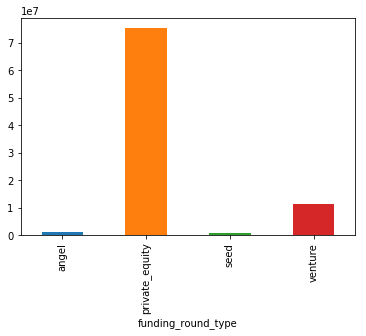

In [33]:
df_2 = master_frame[(master_frame.funding_round_type == 'venture') | (master_frame.funding_round_type == 'angel') | (master_frame.funding_round_type == 'seed')| (master_frame.funding_round_type == 'private_equity')]
df_2.groupby("funding_round_type")['raised_amount_usd'].mean().plot(kind='bar')

## Creating a plot showing the top 9 countries against the total amount of investments of funding type VENTURE

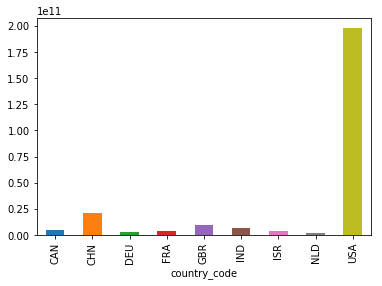

In [34]:
df_3 = master_frame[master_frame.funding_round_type == 'venture']
df_3 = df_1[~np.isnan(df_1['raised_amount_usd'])]
df_3= df_1.groupby('country_code').sum()
df_3 = df_3.nlargest(9, 'raised_amount_usd')
df_3.groupby("country_code")['raised_amount_usd'].mean().plot(kind='bar')

## Creating a plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

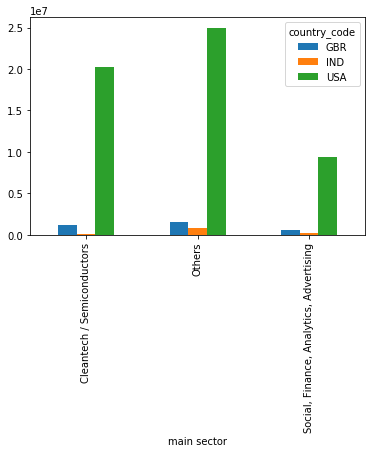

In [35]:
df_1['Number_Of_Investments'] = df_1.groupby('main sector')['main sector'].transform('count')
df_4 = df_1[(df_1['main sector'] == 'Others') | (df_1['main sector'] == 'Cleantech / Semiconductors')| (df_1['main sector'] == 'Social, Finance, Analytics, Advertising')]
df_4 = df_4[(df_4.country_code == 'USA') | (df_4.country_code == 'GBR') | (df_4.country_code == 'IND')]
df_4 = df_4.groupby(['main sector','country_code'])['Number_Of_Investments'].aggregate(np.sum).unstack()
df_4.plot(kind='bar')